In [40]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# 경로 추가 후 전처리 모듈 import
sys.path.append('../scripts')
from preprocessing import load_and_normalize_data

In [33]:
# 정규화된 데이터 불러오기
csv_path = '../data/raw/fred_data_2010_2021.csv'
#df_scaled, scaler = load_and_normalize_data(csv_path) # min-max 정규화
df = pd.read_csv(csv_path)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

,Total CPI,Food and non-alcoholic beverages,"Alcoholic beverages, tobacco and narcotics",Clothing and footwear,"Housing, water, electricity, and fuel",Household goods and services,Health,Transportation,Communication,Recreation and culture,...,Miscellaneous goods and services,All items (non-food non-energy),Energy,Services,Services less housing,Housing excluding imputed rentals for housing,Actual rentals for housing,Water supply and misc. services relating to dwelling,"Electricity, gas and other fuels",Maintenance and repair of the dwelling
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,89.974884,82.96021,64.17831,84.71439,85.73214,88.50813,94.87823,99.07007,105.30200,96.48539,...,93.24129,90.17956,99.99607,90.66600,92.46687,84.16938,84.81021,82.04034,90.50735,82.65888
2010-02-01,90.156202,83.91318,64.17831,84.62941,85.90461,88.77630,94.97273,98.96906,105.30200,96.58245,...,93.42850,90.36152,99.79159,90.84928,92.65275,84.59444,84.98121,83.18968,90.41599,82.65888
2010-03-01,90.338575,84.51744,64.05003,84.62941,85.99136,88.59716,94.97273,99.77214,104.67450,96.48539,...,93.61794,90.36152,100.91090,90.94146,92.74569,84.59444,85.06671,82.69711,90.59785,82.65888
2010-04-01,90.702265,85.81570,64.11417,84.62941,85.99136,88.68726,95.06827,100.57520,104.67450,96.58245,...,93.42850,90.45250,101.72530,91.12366,92.93264,84.59444,85.23771,82.28601,90.69007,82.74136
2010-05-01,90.793978,85.38295,64.05003,84.79937,86.16487,89.13350,95.16277,100.77620,104.67450,96.87465,...,93.80625,90.63446,101.92890,91.30588,93.11852,84.76469,85.40871,82.28601,90.69007,82.90748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,107.799928,118.97870,104.02960,105.31200,103.81380,109.53030,103.75070,107.08090,94.14666,101.83390,...,113.08150,107.32640,93.98415,109.47530,109.06170,111.06050,105.71690,129.37820,78.73211,124.83840
2021-08-01,108.316474,120.62560,104.12270,105.31200,104.08240,109.90570,103.76110,107.91100,94.15618,102.32930,...,113.32520,107.59090,94.95324,109.80760,109.39280,111.38580,105.91500,129.97080,78.90288,125.55710
2021-09-01,108.759227,122.52250,104.20540,105.32250,105.63150,109.95940,103.53260,107.60090,94.16570,101.74290,...,113.10370,107.46390,98.19836,109.60390,109.13650,111.37500,106.10270,129.08190,85.62256,125.87520


In [ ]:
#df_scaled

,Total CPI,Food and non-alcoholic beverages,"Alcoholic beverages, tobacco and narcotics",Clothing and footwear,"Housing, water, electricity, and fuel",Household goods and services,Health,Transportation,Communication,Recreation and culture,...,Miscellaneous goods and services,All items (non-food non-energy),Energy,Services,Services less housing,Housing excluding imputed rentals for housing,Actual rentals for housing,Water supply and misc. services relating to dwelling,"Electricity, gas and other fuels",Maintenance and repair of the dwelling
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.000000,0.000000,0.004784,0.003849,0.000000,0.000000,0.000000,0.199656,1.000000,0.000000,...,0.101135,0.000000,0.457644,0.000000,0.000000,0.000000,0.000000,0.011759,0.384602,0.000000
2010-02-01,0.009288,0.024088,0.004784,0.000000,0.008309,0.011934,0.009646,0.193654,1.000000,0.012218,...,0.109509,0.010227,0.451738,0.009501,0.010947,0.015325,0.007869,0.035250,0.381870,0.000000
2010-03-01,0.018630,0.039361,0.001595,0.000000,0.012489,0.003962,0.009646,0.241369,0.971104,0.000000,...,0.117983,0.010227,0.484066,0.014279,0.016421,0.015325,0.011804,0.025182,0.387309,0.000000
2010-04-01,0.037259,0.072177,0.003189,0.000000,0.012489,0.007972,0.019398,0.289084,0.971104,0.012218,...,0.109509,0.015340,0.507588,0.023723,0.027431,0.015325,0.019673,0.016780,0.390067,0.001858
2010-05-01,0.041957,0.061239,0.001595,0.007698,0.020848,0.027831,0.029045,0.301026,0.971104,0.049001,...,0.126406,0.025567,0.513468,0.033169,0.038379,0.021463,0.027542,0.016780,0.390067,0.005600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,0.913062,0.910425,0.995629,0.936797,0.871130,0.935555,0.905662,0.675622,0.486297,0.673284,...,0.988603,0.963731,0.284005,0.974999,0.977349,0.969506,0.962095,0.979309,0.032431,0.950109
2021-08-01,0.939522,0.952053,0.997944,0.936797,0.884070,0.952261,0.906723,0.724943,0.486735,0.735647,...,0.999503,0.978597,0.311995,0.992225,0.996849,0.981234,0.971211,0.991422,0.037538,0.966298
2021-09-01,0.962201,1.000000,1.000000,0.937272,0.958702,0.954651,0.883399,0.706518,0.487174,0.661829,...,0.989596,0.971459,0.405722,0.981666,0.981754,0.980845,0.979848,0.973253,0.238509,0.973463


In [ ]:
# # 입력 변수와 타겟 변수 설정
# target_variable = 'Total CPI'
# X = df_scaled.drop(columns=['Total CPI'])
# y = df_scaled['Total CPI']

In [48]:
# 입력 변수와 타겟 변수 설정
target_col = "Total CPI"
X = df.drop(columns=[target_col])
y = df[target_col]

In [49]:
# 결측치 처리
X.fillna(method='ffill', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_27660\1866736623.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [50]:
# Min-Max 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# 훈련/테스트 데이터 분할 (시계열 유지)
split_date = '2019-01-01'
X_train, X_test = X.loc[:split_date], X.loc[split_date:]
y_train, y_test = y.loc[:split_date], y.loc[split_date:]

In [55]:
# 라쏘 CV 모델 훈련
lasso_cv = LassoCV(cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000)

In [51]:
# Lasso 회귀 모델 학습
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_scaled, y)

Lasso(alpha=0.001, max_iter=10000)

In [52]:
# 중요도 계산
coef = pd.Series(lasso.coef_, index=X.columns)
non_zero_coef = coef[coef != 0]

importance = np.abs(non_zero_coef)
importance_pct = importance / importance.sum() * 100

In [53]:
# 결과 정리 및 출력
result_df = pd.DataFrame({
    "feature": importance_pct.index,
    "coef": non_zero_coef.values,
    "importance": importance_pct.values
})
result_df = result_df.sort_values(by="importance", ascending=False).reset_index(drop=True)
result_df["rank"] = result_df.index + 1
result_df = result_df[["rank", "feature", "coef", "importance"]]

print(result_df)

    rank                                     feature      coef  importance
0      1             All items (non-food non-energy)  5.277408   25.746460
1      2            Food and non-alcoholic beverages  5.102709   24.894170
2      3       Housing, water, electricity, and fuel  3.083291   15.042200
3      4                       Services less housing  1.707252    8.329029
4      5                              Transportation  1.641675    8.009107
5      6            Miscellaneous goods and services  0.809913    3.951258
6      7                                   Education  0.700026    3.415161
7      8                       Clothing and footwear  0.620197    3.025704
8      9  Alcoholic beverages, tobacco and narcotics  0.538276    2.626043
9     10                Household goods and services  0.451381    2.202115
10    11                                      Energy  0.330399    1.611892
11    12                      Recreation and culture  0.166620    0.812877
12    13                 

In [56]:
# 최적 alpha 확인
best_alpha = lasso_cv.alpha_
print(f"✅ 최적의 alpha 값: {best_alpha:.6f}")

✅ 최적의 alpha 값: 0.056972


In [ ]:
# # 결과 출력
# coef_series = pd.Series(lasso_cv.coef_, index=X.columns)
# non_zero_coef = coef_series[coef_series != 0].sort_values(ascending=False)

# print(f"🔍 최적 alpha (교차검증 기반): {best_alpha:.6f}")
# print(f"🔢 비제로 계수 개수: {(lasso_cv.coef_ != 0).sum()}/{len(lasso_cv.coef_)}\n")

# print("🔍 Lasso 회귀로 선택된 중요 변수:")
# print(non_zero_coef)

🔍 최적 alpha (교차검증 기반): 0.000073
🔢 비제로 계수 개수: 13/21

🔍 Lasso 회귀로 선택된 중요 변수:
Food and non-alcoholic beverages              0.267844
Housing, water, electricity, and fuel         0.171855
Restaurants and hotels                        0.137709
All items (non-food non-energy)               0.101061
Transportation                                0.089158
Education                                     0.072263
Clothing and footwear                         0.064610
Miscellaneous goods and services              0.060626
Alcoholic beverages, tobacco and narcotics    0.032965
Health                                        0.022665
Recreation and culture                        0.019342
Household goods and services                  0.013585
Services less housing                         0.000183
dtype: float64


In [11]:
top_k = int(len(non_zero_coef) * 0.3)
selected_vars = non_zero_coef[:top_k].index  # 상위 계수 변수만 선택
print(f"📌 상위 30% (계수 기준) 변수 {top_k}개:")
print(selected_vars)


📌 상위 30% (계수 기준) 변수 3개:
Index(['Food and non-alcoholic beverages',
       'Housing, water, electricity, and fuel', 'Restaurants and hotels'],
      dtype='object')


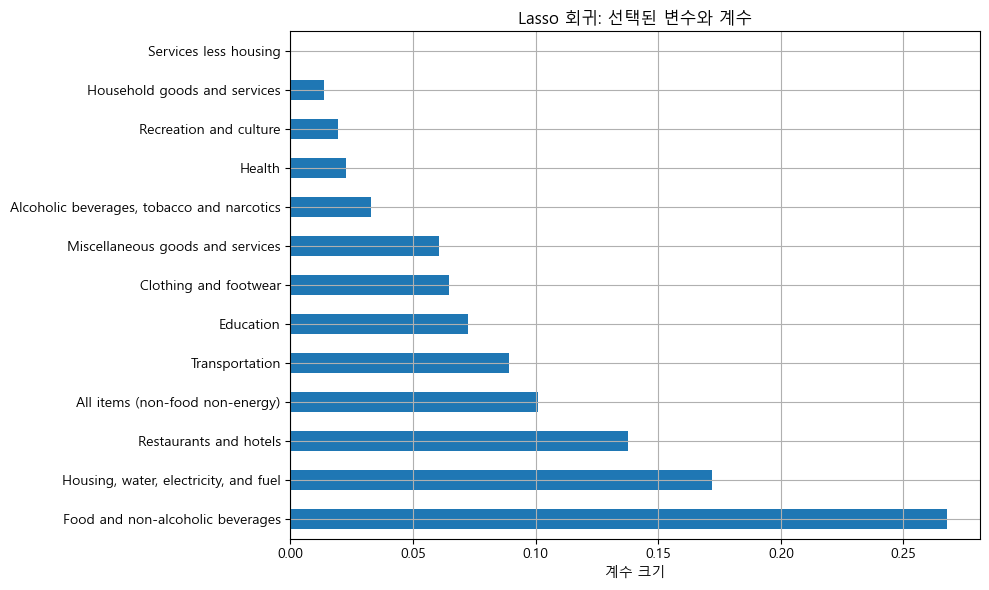

In [ ]:
# 시각화

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 6))
non_zero_coef.plot(kind='barh')
plt.title("Lasso 회귀: 선택된 변수와 계수")
plt.xlabel("계수 크기")
plt.grid(True)
plt.tight_layout()

In [13]:
# 저장
os.makedirs('../results', exist_ok=True)
plt.savefig('../results/lasso_coeff_plot.png')
plt.show()

<Figure size 640x480 with 0 Axes>